In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
# Import first dataset
totalvehicle_data = pd.read_csv('DataSets/TOTALSA.csv', )
totalvehicle_data = totalvehicle_data.dropna()
totalvehicle_data.head()

,DATE,TOTALSA
0,1976-01-01,12.814
1,1976-02-01,13.340
2,1976-03-01,13.378
3,1976-04-01,13.223
4,1976-05-01,12.962


In [17]:
# Clean DataSet 1
totalvehicle_data2 = totalvehicle_data.loc[totalvehicle_data["DATE"].between("2019-01-01", "2023-07-01")]
totalvehicle_data2.head()

,DATE,TOTALSA
516,2019-01-01,17.291
517,2019-02-01,16.968
518,2019-03-01,17.733
519,2019-04-01,16.898
520,2019-05-01,17.725


In [18]:
# Import second dataset
meanvehicle_data = pd.read_csv('DataSets/CUSR0000SETA01.csv')
meanvehicle_data = meanvehicle_data.dropna()
meanvehicle_data.head()

,DATE,CUSR0000SETA01
0,1953-01-01,46.3
1,1953-02-01,46.8
2,1953-03-01,46.9
3,1953-04-01,47.3
4,1953-05-01,47.5


In [19]:
# Clean DataSet 2
meanvehicle_data2 = meanvehicle_data.loc[meanvehicle_data["DATE"].between("2019-01-01", "2023-07-01")]
meanvehicle_data2.head()

,DATE,CUSR0000SETA01
792,2019-01-01,147.849
793,2019-02-01,147.822
794,2019-03-01,148.516
795,2019-04-01,147.788
796,2019-05-01,147.071


In [20]:
# Import third dataset
newvehicle_data = pd.read_csv('DataSets/IPUHN44111T051000000.csv')
newvehicle_data = newvehicle_data.dropna()
newvehicle_data.head()

,DATE,IPUHN44111T051000000
0,1988-01-01,2.5
1,1989-01-01,2.4
2,1990-01-01,1.2
3,1991-01-01,3.1
4,1992-01-01,3.1


In [21]:
# Clean DataSet 2
newvehicle_data2 = newvehicle_data.loc[newvehicle_data["DATE"].between("2019-01-01", "2023-07-01")]
newvehicle_data2.head()

,DATE,IPUHN44111T051000000
31,2019-01-01,0.9
32,2020-01-01,1.3
33,2021-01-01,10.2
34,2022-01-01,12.0


In [22]:
# Import fourth dataset
singlevehicle_data = pd.read_csv('DataSets/train.csv')
singlevehicle_data = singlevehicle_data.dropna()
singlevehicle_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [23]:
# Delete extraneous column
singlevehicle_data2 = singlevehicle_data.drop(['ID', 'Levy', 'Model',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'], axis = 1)
singlevehicle_data2.head()

,Price,Manufacturer,Prod. year,Mileage
0,13328,LEXUS,2010,186005 km
1,16621,CHEVROLET,2011,192000 km
2,8467,HONDA,2006,200000 km
3,3607,FORD,2011,168966 km
4,11726,HONDA,2014,91901 km


In [24]:
# Use df.astype() method to convert the datatype of the Zip column
singlevehicle_data3 = singlevehicle_data2.astype({"Prod. year": str}, errors='raise')

In [25]:
singlevehicle_data3['Prod. year'].dtype

dtype('O')

In [26]:
singlevehicle_data3.head()

,Price,Manufacturer,Prod. year,Mileage
0,13328,LEXUS,2010,186005 km
1,16621,CHEVROLET,2011,192000 km
2,8467,HONDA,2006,200000 km
3,3607,FORD,2011,168966 km
4,11726,HONDA,2014,91901 km


In [27]:
# Clean DataSet 4
singlevehicle_data4 = singlevehicle_data3.loc[singlevehicle_data3["Prod. year"].between("2019", "2023")]
singlevehicle_data4.head()

,Price,Manufacturer,Prod. year,Mileage
36,51746,TOYOTA,2019,10200 km
56,87112,MERCEDES-BENZ,2019,5323 km
81,7527,TOYOTA,2019,27656 km
170,470,MAZDA,2019,11566 km
261,59865,HYUNDAI,2019,13000 km


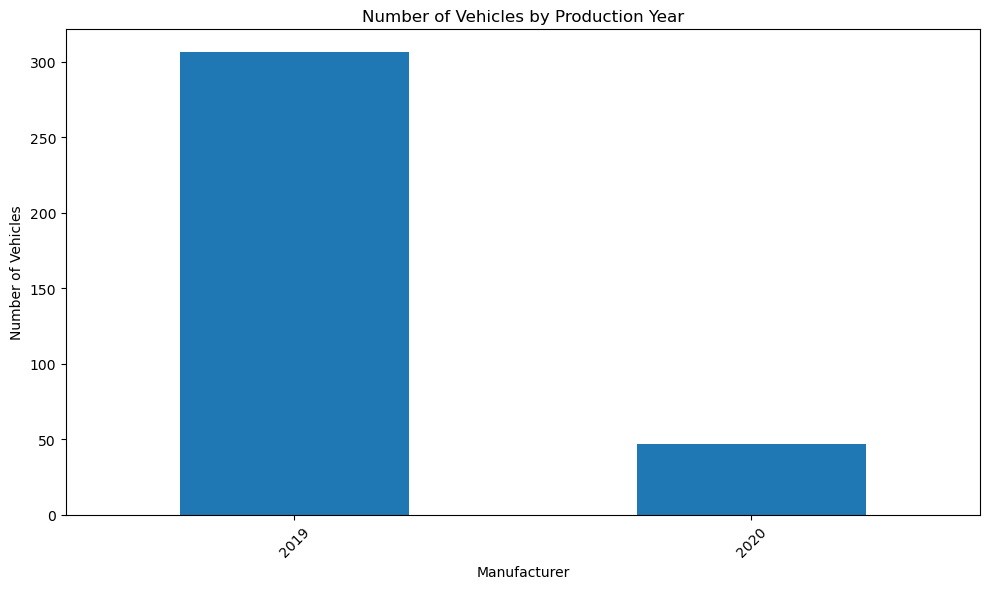

In [42]:
singlevehicle_data3 = pd.read_csv('DataSets/train.csv')
singlevehicle_data4 = singlevehicle_data3.loc[singlevehicle_data3["Prod. year"].astype(str).between("2019", "2023")]
year_counts = singlevehicle_data4["Prod. year"].value_counts()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Number of Vehicles by Production Year')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
